In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma as gamma_function
from numpy import size
from scipy.spatial.distance import cdist
import datetime
from matplotlib import gridspec
from scipy.stats import norm

from scipy.stats import gamma
from funct import *

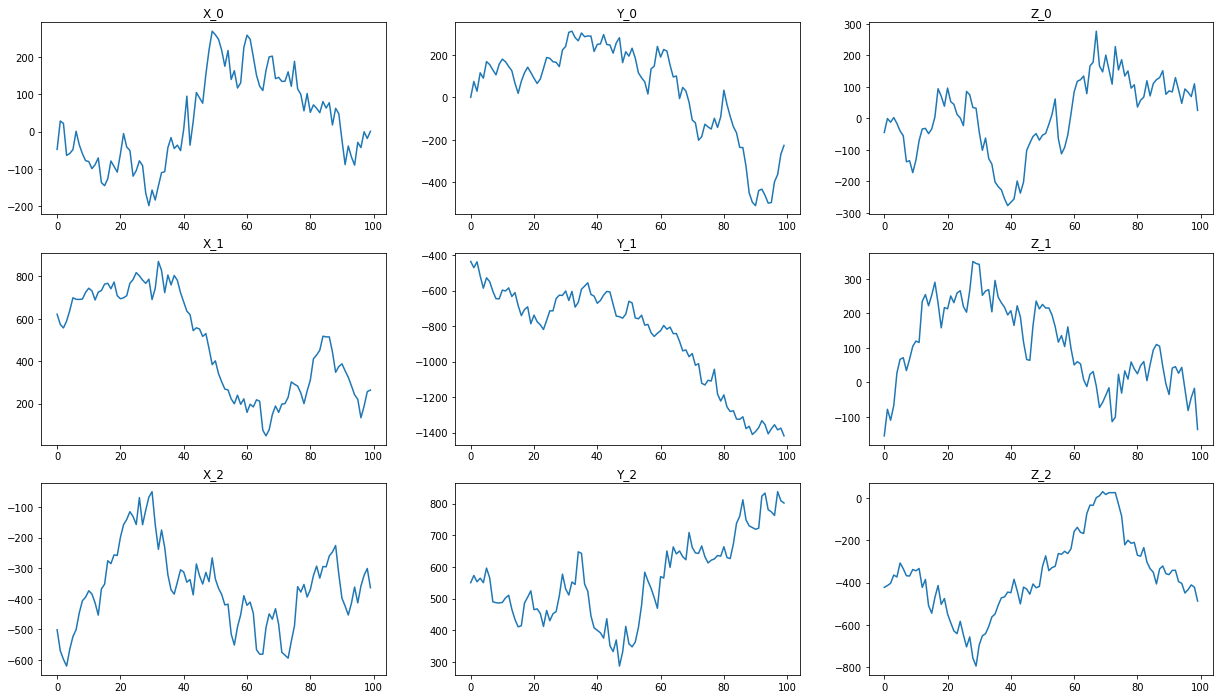

In [7]:
PSFtype='AS'; D=20; Dt=20; NFrame=100; I=4000; Bg=[10,25]; Number=3; Scale=2
struct = np.load('PSFstruct_3RND9.npy', allow_pickle=True)
Data = np.load('Data_3RND9.npy')
PSFstruct = struct[()]

fig, ax = plt.subplots(Number, 3, figsize=(21, Number*4))
for i in range(Number):
  ax[i,0].plot(PSFstruct['X'][i,:])
  ax[i,0].set_title(f'X_{i}')
  ax[i,1].plot(PSFstruct['Y'][i,:])
  ax[i,1].set_title(f'Y_{i}')
  ax[i,2].plot(PSFstruct['Z'][i,:])
  ax[i,2].set_title(f'Z_{i}')
plt.show()

In [ ]:
BNP = {}
BNP.update(NJump = 240002) #Number of samples from the posterior
BNP.update(T_A = 1) #GP parameter on amplitude of pupil function
BNP.update(L_A = 4/(PSFstruct['PixelSize']*PSFstruct['NPix'])) #GP parameter on amplitude
BNP.update(T_Phi = 1) #GP parameter on phase
BNP.update(L_Phi = 4/(PSFstruct['PixelSize']*PSFstruct['NPix'])) #GP parameter on phase
BNP.update(D = D) #Diffusion coefficient
BNP.update(Dt = Dt) #Exposure time
BNP.update(SubPixel = 1) #Number of interpolated sub-pixels
BNP.update(gm = 3)# number of particle we guess
M = 6
#Initializing X and Y trajectories
# Xstart, Ystart = find_init(Data.copy(), BNP['gm'], M, NFrame)
#running the code
DatA = np.moveaxis(Data,-1,0)
print(f"time = {datetime.datetime.now()}")
Chain = RunRit(DatA,PSFstruct,BNP, Bg, D,M)

time = 2023-03-30 19:04:01.319946


### END ### 

In [ ]:
log_post =  16025190.653924856
log_like = 16034246.050804233